In [13]:
# Import Modules
#data manipulation
import numpy as np
import pandas as pd

#nn
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize

#visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

torch.manual_seed(1)

In [14]:
# Load the Data
df=pd.read_excel('v4_BMED_data.xlsx', sheet_name = 'Opt2')
df['V'] = df['V'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       214 non-null    float64
 1   V       214 non-null    float64
 2   E       214 non-null    float64
 3   Ci      214 non-null    float64
 4   t2      214 non-null    float64
 5   CF      214 non-null    float64
 6   CA      214 non-null    float64
 7   SEC     214 non-null    float64
 8   JLA     214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


## modeling



In [15]:
# Set the training data
X_data = df[['T','V','E','Ci','t2']].values
Y_data = df[['CF','CA']].values

# transform the pytorch tensor
X = torch.FloatTensor(X_data)
Y = torch.FloatTensor(Y_data)


# Declare the Custom Models
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,80),
            nn.ReLU(),
            nn.Linear(80,80),
            nn.ReLU(),
            nn.Linear(80,80),
            nn.ReLU(),
            nn.Linear(80,80),
            nn.ReLU(),
            nn.Linear(80,80),
            nn.ReLU(),
            nn.Linear(80,2)
        )

    def forward(self, x):
        return self.hidden(x)
    

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(X):
    train_index = torch.tensor(train_index, dtype=torch.long)
    test_index = torch.tensor(test_index, dtype=torch.long)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # NN model initialization
    model = CustomModel()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    # Learning Loop
    num_epochs = 10000
    
    for epoch in range(num_epochs+1):
        # forward_propagation
        Y_pred = model(X_train)
        loss = criterion(Y_pred,Y_train)

        # cost로 H(x) 개선
        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        ##weight update
        optimizer.step()

        if epoch % 1000 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    mse_loss = nn.MSELoss()
    yp = model(X_test)
    scores.append(mse_loss(Y_test,yp).item())
    iter += 1
    

print("Cross validation scores : {}".format(scores))
print("Average score: {}".format(np.mean(scores)))




iter : 1, epoch: 0, loss: 2.1168904304504395
iter : 1, epoch: 1000, loss: 0.019375471398234367
iter : 1, epoch: 2000, loss: 0.008901674300432205
iter : 1, epoch: 3000, loss: 0.00847865641117096
iter : 1, epoch: 4000, loss: 0.004653111565858126
iter : 1, epoch: 5000, loss: 0.004290965385735035
iter : 1, epoch: 6000, loss: 0.0043868557550013065
iter : 1, epoch: 7000, loss: 0.003841249505057931
iter : 1, epoch: 8000, loss: 0.002367527224123478
iter : 1, epoch: 9000, loss: 0.002731999382376671
iter : 1, epoch: 10000, loss: 0.001761751715093851
iter : 2, epoch: 0, loss: 2.0263304710388184
iter : 2, epoch: 1000, loss: 0.009243182837963104
iter : 2, epoch: 2000, loss: 0.0038778537418693304
iter : 2, epoch: 3000, loss: 0.0023003271780908108
iter : 2, epoch: 4000, loss: 0.00253514782525599
iter : 2, epoch: 5000, loss: 0.0010836158180609345
iter : 2, epoch: 6000, loss: 0.0012589890975505114
iter : 2, epoch: 7000, loss: 0.0008715785224922001
iter : 2, epoch: 8000, loss: 0.000786184857133776
iter 

In [16]:
model= CustomModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Learning Loop
num_epochs = 20000
losses = []

for epoch in range(num_epochs+1):
    # forward_propagation
    y_pred = model(X)
    loss = criterion(y_pred,Y)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')





Epoch [1000/20000], Loss: 0.021333
Epoch [2000/20000], Loss: 0.012820
Epoch [3000/20000], Loss: 0.008125
Epoch [4000/20000], Loss: 0.013080
Epoch [5000/20000], Loss: 0.005944
Epoch [6000/20000], Loss: 0.005427
Epoch [7000/20000], Loss: 0.004781
Epoch [8000/20000], Loss: 0.006705
Epoch [9000/20000], Loss: 0.004641
Epoch [10000/20000], Loss: 0.003330
Epoch [11000/20000], Loss: 0.004148
Epoch [12000/20000], Loss: 0.003947
Epoch [13000/20000], Loss: 0.002657
Epoch [14000/20000], Loss: 0.005787
Epoch [15000/20000], Loss: 0.004162
Epoch [16000/20000], Loss: 0.004300
Epoch [17000/20000], Loss: 0.002115
Epoch [18000/20000], Loss: 0.000595
Epoch [19000/20000], Loss: 0.000612
Epoch [20000/20000], Loss: 0.000462


In [17]:
y_pred2 = model(X)

print(y_pred2.detach().cpu().numpy())

[[ 2.66735315e+00  2.23620668e-01]
 [ 3.36207986e+00  5.90713322e-03]
 [ 2.45970130e+00  5.73844135e-01]
 [ 1.78961396e+00  1.02250248e-01]
 [ 8.68971527e-01  1.99045837e-02]
 [ 8.17270041e-01  1.53361410e-02]
 [ 2.89149141e+00  3.81724536e-03]
 [ 9.32200849e-01  1.09928846e-03]
 [ 4.46586043e-01  1.69137120e-03]
 [ 4.71520603e-01  3.23638320e-04]
 [ 7.75239408e-01  3.46769318e-02]
 [ 2.20765662e+00  8.79216433e-01]
 [ 9.31596279e-01  3.99381518e-02]
 [ 8.44551444e-01  1.38109505e-01]
 [ 4.13996786e-01  8.38793814e-03]
 [ 9.40070212e-01  1.01576596e-02]
 [ 2.65458894e+00  4.99079674e-02]
 [ 9.35599029e-01  1.47958547e-02]
 [ 1.55456531e+00  1.56960523e+00]
 [ 3.03925586e+00  2.70351693e-02]
 [ 8.79979312e-01  1.03386790e-01]
 [ 8.94545794e-01  4.54251319e-02]
 [ 2.26587868e+00  3.50678504e-01]
 [ 3.78455907e-01  2.62198925e-01]
 [ 4.05403495e-01 -1.29051507e-03]
 [ 2.62935615e+00  9.75515991e-02]
 [ 2.76089168e+00  3.06729972e-02]
 [ 4.03151631e-01  2.43407890e-01]
 [ 2.64518976e-01  2

0.9997921088056969

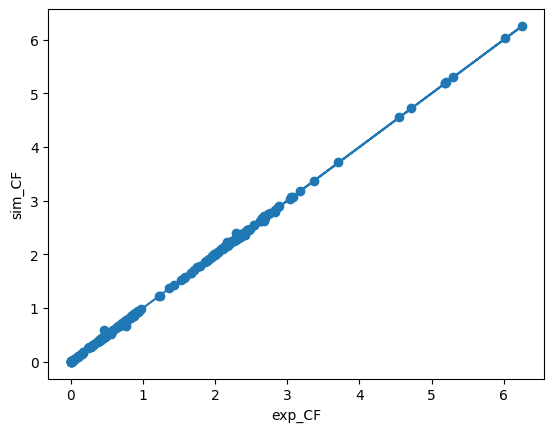

In [18]:
y_num = y_pred2.detach().numpy()
Y_num = Y.detach().numpy()
y_CF = [i[0] for i in y_num]
y_CA = [i[1] for i in y_num]
Y_CF = [i[0] for i in Y_num]
Y_CA = [i[1] for i in Y_num]

plt.scatter(Y_CF,y_CF)
plt.plot(Y_CF,Y_CF)
plt.xlabel('exp_CF')
plt.ylabel('sim_CF')
r2_score(Y_CF, y_CF)


0.9976651759518224

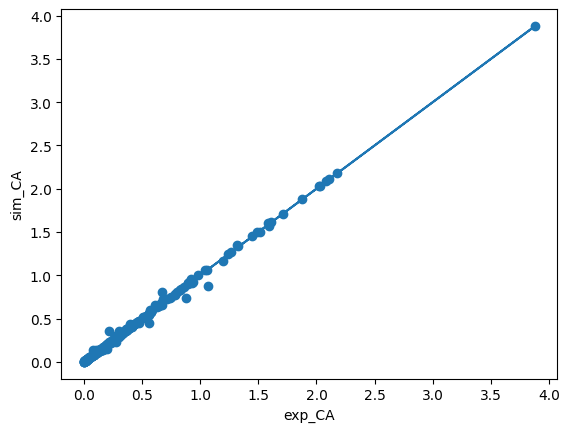

In [19]:
plt.scatter(Y_CA,y_CA)
plt.plot(Y_CA,Y_CA)
plt.xlabel('exp_CA')
plt.ylabel('sim_CA')
r2_score(Y_CA, y_CA)

In [20]:
torch.save(model.state_dict(), 'model.pth')